Rafał Nowak
# Numerical Optimization
## Problem set 4 (15 points)

**Submission deadline**: Thursday, 31.12.2020

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

### Test function #1

Observe that the methods in previous problem sets require only to evaluate the value of the objective function $f$.

From now we assume we know also its derivative.<br/>
For example, consider the function
$$ f(x) = x^4 + 16x^2 + 18(x-4) e^x\qquad (x\in\mathbb R). $$
First implement the function
```julia
# function gets scalar x as input and returns f(x) and f'(x)
function my_func(x, order=0)
    value = ____
    if order == 0
        return value
    elseif order == 1
        gradient = ____
        return (value, gradient)
    end
end
```

Below, all the problems are about to implement the method.
In each problem, please provide some experiments and tests.
You can use the function $f$ above, but do not forget to experiment 
with other functions.

$f'(x) = 4x^3 + 32x + 18( e^x + (x-4)e^x ) = 4x^3 + 32x + 18(x-3)e^x$

In [2]:
def f(x, order=0):
    value = x**4 + 16*x**2 + 18*(x-4)*np.exp(x)
    if order==1:
        gradient = 4*x**3 + 32*x + 18*(x-3)*np.exp(x)
        return value, gradient
    return value

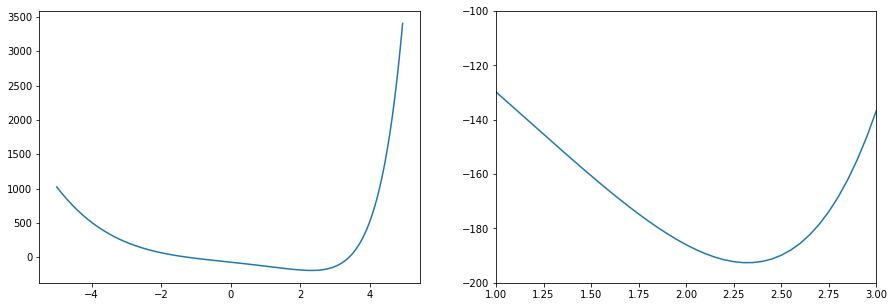

In [3]:
X = np.arange(-5,5,.05)
Y = f(X)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(X,Y)
ax[1].plot(X,Y)
ax[1].set_xlim(1,3)
ax[1].set_ylim(-200,-100)
plt.show()

### Test function #2

$f_2(x_1, x_2) := 2x_1^2 + 3x_2^2 + 4x_2$

$f'_2(x_1, x_2) := [4x_1, 6x_2 + 4]$

In [4]:
def f2(x, order=0):
    val = 2*x[0]**2 + 3*x[1]**2 + 4*x[1]
    if order==0:
        return val
    grad = np.array([4*x[0], 6*x[1] + 4])
    return val, grad

### Problem 4.1 (Bisection 3 pts) 

* Implement bisection method to find the minimum of $f$
* Initialize the method with $x_{\text{left}}=-10$ and $x_{\text{right}}=10$.

```julia
# bisection gets function f, performs bisection search
# on interval [a, b] and returns an eps-suboptimal
# solution x; i.e. f(x)-f(x^*) <= eps .
function bisection(fun, MIN, MAX; epsilon=1e-5, max_iter=65536)
    # counting the number of iterations
    counter = 0
    while true
        counter +=1
        MID = ( MAX + MIN ) / 2

        # Oracle access to the function value and gradient
        value, gradient = fun( MID, order=1 )

        # provide an upper bound for the suboptimality of MID in terms of
        # the magnitude of the gradient and distance from the optimum
        ###############################
        # TODO: suboptimality = ???
        ###############################

        if suboptimality <= eps
            break
        end

        if gradient > 0
          ###############################
          # TODO: Updating the interval #
          ###############################
        else
          ###############################
          # TODO: Updating the interval #
          ###############################
        end
    end
    @printf( "Number of Iterations: %d", counter )
    @printf( "Suboptimal point: %1.15"', MID )
    @printf( "Suboptimal value: %1.15"', value )
    return MID    
end
```

I implemented the standard bisection algorithm for one dimension optimization. In every iteration if the gradient in midpoint is positive then the optimal point is on the left side of the brackets, else the optimal point is on the right side of the brackets. If the absolute value of the gradient is smaller than the given epsilon or the size of the bracket is smaller than epsilon then I stop the algorithm. I tested the version where both of those conditions had to be true, but it was slower and didn't guarantee better accuracy.

In [5]:
def bisection(f, min_, max_, eps=1e-5, max_iter=50000, debug=False):
    count = 0
    while True:
        count+=1
        
        mid_ = (min_+max_)/2
        val, grad = f(mid_, order=1)
        
        suboptimality = max(np.abs(grad), np.abs((max_-min_)/2))
        if suboptimality <= eps or count >= max_iter:
            break

        if grad > 0:
            max_ = mid_
        else:
            min_ = mid_
    if debug:
        print("Number of Iterations: ", count)
        print("Suboptimal point: ", np.round(mid_, 15))
        print("Suboptimal value: ", np.round(val, 15))
    return mid_

In [6]:
bisection(f, -10, 10, debug=True)

Number of Iterations:  28
Suboptimal point:  2.322324588894844
Suboptimal value:  -192.62418183070687


2.322324588894844

---

### Problem 4.2 (Exact line search, 3 pts)

Implement the *line_search* algorithm, which general idea is as follow :
```julia
function line_search(f, x, d)
    objective = α -> f(x + α*d)
    a, b = bracket_minimum(objective)
    α = minimize(objective, a, b)
    return x + α*d
end
```
Some notes from Boyd's book are given below.
<img src="https://i.ibb.co/YRqd9Q2/Boyd-line-search.png" alt="Boyd-line-search" border="0">


In this problem you should implement the function
```julia
function exact_line_search( f, x, direction, eps=1e-9, maximum_iterations=65536 )
    # TODO
    
end
```

where the *bisection* method is used for optimizing in `line_search` and
* `f` is the function to optimize; assume one can call it like `value, gradient = f( x, order=1 )`
* `x` is the the current iterate
* `direction` is the direction along which to perform the linesearch
* `eps` is the maximum allowed error in the resulting stepsize $t$
* `maximum_iterations` is the maximum allowed number of iterations

In [7]:
def find_initial_bracket(f, x=0, s=1e-5, k=2.0):
    a,fa = x,f(x)
    b,fb = a+s,f(a+s)
    if fb>fa:
        a,fa,b,fb,s = b,fb,a,fa,-s
    while True:
        c,fc = b+s,f(b+s)
        if fc>fb:
            return min(a,c),max(a,c)
        a,fa,b,fb,s = b,fb,c,fc,k*s

Exact line search algorithm.

Given the function $f$, actual point $x$, and the direction $\Delta x$ (typically $\Delta x = - \nabla f(x)$) we can define function $t \rightarrow f(x+t* \Delta x)$ with derrivative $\frac {\partial f}{\partial t} = {\Delta x}^T \nabla f(x+t* \Delta x)$.

We want to find $argmin_{t \geq 0} \, f(x+t* \Delta x)$ and we can done it using bisection algorithm. 

Remark: we have to find initial brackets before starting the bisection algorithm.

In [8]:
def exact_line_search(f, x, direction, eps=1e-9, maximum_iterations=65536, debug=False):
    
    def fun_(t, x, direction, order=0):
        val, grad = f(x+t*direction, order=1)
        if order==0:
            return val
        
        if not isinstance(grad, np.ndarray):
            return val, direction*grad
        
        direction = direction.reshape(-1,1)
        grad = grad.reshape(1,-1)
        return val, grad@direction
    
    fun = lambda t, order=0: fun_(t, x, direction, order)
    
    a,b = find_initial_bracket(fun)
    if debug:
        print(f'Initial brackets: ({a}, {b})')
    t = bisection(fun, a, b, eps, maximum_iterations, debug)
    
    return x+t*direction

#### function #1

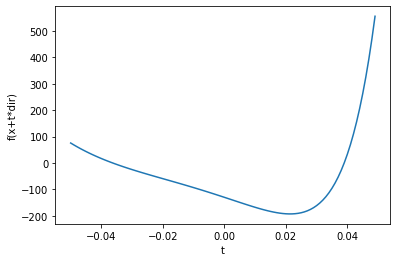

In [9]:
x = 1
val, grad = f(x, order=1)
direction = -grad
T = np.arange(-0.05,0.05,.001)
fun = lambda t: f(x+t*direction)
Y = fun(T)
plt.plot(T,Y)
plt.xlabel('t')
plt.ylabel('f(x+t*dir)')
plt.show()

In [10]:
exact_line_search(f, x, direction, debug=True)

Initial brackets: (0.01024, 0.04096)
Number of Iterations:  41
Suboptimal point:  0.021376725175041
Suboptimal value:  -192.6241818307068


2.32232458312848

In this example global minimum is in our direction, so we can find it using one exact line search.

#### function #2

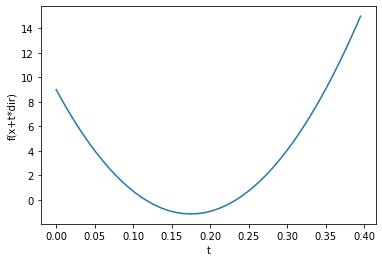

In [11]:
x = np.array([1,1])
val, grad = f2(x, order=1)
direction = -grad
T = np.arange(0,0.4,.005)
fun = lambda t: f2(x+t*direction)
Y = [fun(t) for t in T]
plt.plot(T,Y)
plt.xlabel('t')
plt.ylabel('f(x+t*dir)')
plt.show()

In [12]:
exact_line_search(f2, x, direction, debug=True)

Initial brackets: (0.08192, 0.32768)
Number of Iterations:  37
Suboptimal point:  0.174698795180917
Suboptimal value:  -1.132530120481928


array([ 0.30120482, -0.74698795])

---

### Problem 4.3. (Backtracking line search 3 pts)

In this problem you should implement backtracking linesearch algorithm
```julia
function backtracking_line_search( f, x, direction, α=0.4, β=0.9, maximum_iterations=65536 )
    # TODO
    
end
```

where the *bisection* method is used for optimizing in `line_search` and
* `f` is the function to optimize; assume one can call it like `value, gradient = f( x, order=1 )`
* `x` is the the current iterate
* `direction` is the direction along which to perform the linesearch
* `eps` is the maximum allowed error in the resulting stepsize $t$
* `α` is the alpha parameter to backtracking linesearch
* `β` is the beta parameter to backtracking linesearch
* `maximum_iterations` is the maximum allowed number of iterations

Another way for optimization the $t \rightarrow f(x+t* \Delta x)$ function is the backtracking line search algorithm. It doesn't guarantee to find the optimal solution, but it tends to find a good enough solution in a shorter time than an exact line search algorithm.

In [21]:
def backtracking_line_search(f, x, direction, alpha=0.4, beta=0.9, maximum_iterations=65536, debug=False):
    t = 1
    count = 0
    act_val = f(x+t*direction)
    f_x, grad_x = f(x, order=1)
    if isinstance(grad_x, np.ndarray):
        grad_x = grad_x.reshape(-1,1)
        d = direction.reshape(1,-1)
        grad_dir = (d@grad_x)[0][0]
    else:
        grad_dir = grad_x * direction
    
    while count < maximum_iterations and act_val > f_x + t*alpha*grad_dir:
        count += 1
        t*=beta
        act_val = f(x+t*direction)
    
    if debug:
        print("Number of Iterations: ", count)
        print("t value: ", np.round(t, 15))
        print("Suboptimal point: ", np.round(x+t*direction, 15))
        print("Suboptimal value: ", np.round(act_val, 15))
        
    return x+t*direction

#### function #1

In [22]:
x = 1
val, grad = f(x, order=1)
direction = -grad
backtracking_line_search(f, x, direction, debug=True)

Number of Iterations:  34
t value:  0.027812838944369
Suboptimal point:  2.720450647214846
Suboptimal value:  -176.60284920557785


2.7204506472148466

This time the solution is not optimal. 

#### function #2

In [23]:
x = np.array([1,1])
val, grad = f2(x, order=1)
direction = -grad
backtracking_line_search(f2, x, direction, debug=True)

Number of Iterations:  15
t value:  0.205891132094649
Suboptimal point:  [ 0.17643547 -1.05891132]
Suboptimal value:  -0.809506775607502


array([ 0.17643547, -1.05891132])

---

### Problem 3.6 (Gradient descent 6 pts)

(3 pts) Implement the *gradient descent* algorithm using the given linesearch method
```julia
function gradient_descent( f, x0, eps=1e-5, maximum_iterations=65536, linesearch_algorithm=exact_line_search )
    """
    f:                    the function to optimize It is called as "value, gradient = func( x, 1 )
    x0:                   the starting point
    eps:                  the maximum allowed error in the resulting stepsize t
    maximum_iterations:   the maximum allowed number of iterations
    linesearch_algorithm: the linesearch routine
    """
end
```

Finally, we can implement the gradient descent algorithm. In every iteration, we're trying to find optimal (or good enough) t to optimize $f(x+t* \Delta x)$. Then we can update our $x$: 

$x_{k+1} = x_{k} + t*direction$, with $direction = - \nabla f(x)$

I'm stopping the algorithm when the absolute value of a gradient is small enough in every direction, or the number of performed iterations exceeds the maximum number of iterations.

In [24]:
def gradient_descent(f, x0, eps=1e-5, maximum_iterations=65536, linesearch_algorithm=exact_line_search, debug=False):
    """
    f:                    the function to optimize It is called as "value, gradient = func( x, 1 )
    x0:                   the starting point
    eps:                  the maximum allowed error in the resulting stepsize t
    maximum_iterations:   the maximum allowed number of iterations
    linesearch_algorithm: the linesearch routime
    """
    
    count = 0
    val, grad = f(x0, order=1)
    x = x0
    while count < maximum_iterations and np.any(np.abs(grad) > 1e-5):
        count += 1
        x = linesearch_algorithm(f, x, -grad)
        val, grad = f(x, order=1)
    
    if debug:
        print("Number of Iterations: ", count)
        print("Final point: ", np.round(x, 15))
        print("Final value: ", np.round(val, 15))
    
    return x

### Tests (3 pts) 
Test your method with above function `f`, and the following functions (written in `Python`) `boyd` and `quadratic` (with different types of matrix $H$)
Other test functions are welcome.

```python

###############################################################################
def boyd_example_func(x, order=0):
  a=np.matrix('1  3')
  b=np.matrix('1  -3')
  c=np.matrix('-1  0')
  x=np.asmatrix(x)
  
  value = exp(a*x-0.1)+exp(b*x-0.1)+exp(c*x-0.1)
  if order==0:
      return value
  elif order==1:
      gradient = a.T*exp(a*x-0.1)+b.T*exp(b*x-0.1)+c.T*exp(c*x-0.1)
      return (value, gradient)
  elif order==2:
      gradient = a.T*exp(a*x-0.1)+b.T*exp(b*x-0.1)+c.T*exp(c*x-0.1)
      hessian = a.T*a*exp(a*x-0.1)+b.T*b*exp(b*x-0.1)+c.T*c*exp(c*x-0.1)
      return (value, gradient, hessian)
  else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")


###############################################################################
def quadratic( H, b, x, order=0 ):
    """ 
    Quadratic Objective
    H:          the Hessian matrix
    b:          the vector of linear coefficients
    x:          the current iterate
    order:      the order of the oracle. For example, order=1 returns the value of the function and its gradient while order=2 will also return the hessian
    """
    H = np.asmatrix(H)
    b = np.asmatrix(b)
    x = np.asmatrix(x)
    
    value = 0.5 * x.T * H * x + b.T * x

    if order == 0:
        return value
    elif order == 1:
        gradient = H * x + b
        return (value, gradient)
    elif order == 2:
        gradient = H * x + b
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")
```




I tested implemented methods on different functions, both those given in the problem and my own ones.

It seems to work quite well, the accuracy when using both exact line search and backtracking line search algorithms are similar, but the version with the backtracking line search algorithm is much faster, which is especially important with problems of higher dimensionality.

#### function #1

SciPy minimization function (with BFGS) - https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs

In [25]:
res = minimize(f, np.array([0]), method='BFGS', jac=lambda x: f(x, order=1)[1])
print(res)
print('Value in optimal point: ', f(res['x'])[0])

      fun: -192.62418183070685
 hess_inv: array([[0.00641733]])
      jac: array([2.79710434e-07])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([2.32232458])
Value in optimal point:  -192.62418183070685


In [26]:
print('Linesearch algorithm: exact line search')
x_els = gradient_descent(f, 0, debug=True)
print('Absolute error: ', np.round(np.abs(res['x'][0] - x_els), 15))
print('Relative error: ', np.round(np.abs((res['x'][0] - x_els)/res['x'][0]), 15))
print('MSE: ', np.round((res['x'][0] - x_els)**2, 15))

Linesearch algorithm: exact line search
Number of Iterations:  1
Final point:  2.322324583128488
Final value:  -192.62418183070685
Absolute error:  1.794173e-09
Relative error:  7.72576e-10
MSE:  0.0


In [27]:
print('Linesearch algorithm: backtracking line search')
x_bls = gradient_descent(f, 0, linesearch_algorithm=backtracking_line_search, debug=True)
print('Absolute error: ', np.round(np.abs(res['x'][0] - x_bls), 15))
print('Relative error: ', np.round(np.abs((res['x'][0] - x_bls)/res['x'][0]), 15))
print('MSE: ', np.round((res['x'][0] - x_bls)**2, 15))

Linesearch algorithm: backtracking line search
Number of Iterations:  9
Final point:  2.322324598117229
Final value:  -192.62418183070685
Absolute error:  1.3194567e-08
Relative error:  5.681621e-09
MSE:  0.0


#### function #2

In [28]:
res2 = minimize(f2, np.array([1,1]), method='BFGS', jac=lambda x: f2(x, order=1)[1])
print(res2)
print('Value in optimal point: ', f2(res2['x']))

      fun: -1.3333333333333295
 hess_inv: array([[ 0.25161869, -0.00049938],
       [-0.00049938,  0.16682073]])
      jac: array([ 1.63618155e-07, -7.57168497e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 4.09045387e-08, -6.66666679e-01])
Value in optimal point:  -1.3333333333333295


In [29]:
print('Linesearch algorithm: exact line search')
x_els = gradient_descent(f2, np.array([1,1]) , debug=True)
print('MSE: ', np.round(np.mean((res2['x'] - x_els)**2), 15))

Linesearch algorithm: exact line search
Number of Iterations:  7
Final point:  [ 2.21030605e-06 -6.66667256e-01]
Final value:  -1.33333333332252
MSE:  2.519e-12


In [30]:
print('Linesearch algorithm: backtracking line search')
x_bls = gradient_descent(f2, np.array([1,1]), linesearch_algorithm=backtracking_line_search, debug=True)
print('MSE: ', np.round(np.mean((res2['x'] - x_bls)**2), 15))

Linesearch algorithm: backtracking line search
Number of Iterations:  9
Final point:  [ 3.56453398e-07 -6.66667500e-01]
Final value:  -1.333333333330996
MSE:  3.87e-13


#### boyd example function

In [31]:
def boyd_example_func(x, order=0):
    a = np.array([1,3])
    b = np.array([1,-3])
    c = np.array([-1,0])

    value = np.exp(a@x-0.1)+np.exp(b@x-0.1)+np.exp(c@x-0.1)
    if order==0:
        return value
    elif order==1:
        gradient = a*np.exp(a@x-0.1)+b*np.exp(b@x-0.1)+c*np.exp(c@x-0.1)
        return (value, gradient)
    elif order==2:
        gradient = a*np.exp(a@x-0.1)+b*np.exp(b@x-0.1)+c*np.exp(c@x-0.1)
        a = a.reshape(1,-1)
        b = b.reshape(1,-1)
        c = c.reshape(1,-1)
        x_ = x.reshape(-1,1)
        hessian = a.T*a*np.exp(a@x-0.1)+b.T*b*np.exp(b@x-0.1)+c.T*c*np.exp(c@x-0.1)
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")

In [32]:
res = minimize(boyd_example_func, np.array([1,1]), method='BFGS', jac=lambda x: boyd_example_func(x, order=1)[1])
print(res)
print('Value in optimal point: ', boyd_example_func(res['x']))

      fun: 2.559266696658241
 hess_inv: array([[ 0.38438359, -0.00349181],
       [-0.00349181,  0.08492073]])
      jac: array([-2.33999667e-07, -5.78452418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([-3.46573682e-01, -5.02272755e-08])
Value in optimal point:  2.559266696658241


In [33]:
print('Linesearch algorithm: exact line search')
x_els = gradient_descent(boyd_example_func, np.array([1,1]) , debug=True)
print('MSE: ', np.round(np.mean((res['x'] - x_els)**2), 15))

Linesearch algorithm: exact line search
Number of Iterations:  17
Final point:  [-3.46570816e-01 -2.05147762e-07]
Final value:  2.559266696668308
MSE:  4.119e-12


In [34]:
print('Linesearch algorithm: backtracking line search')
x_bls = gradient_descent(boyd_example_func, np.array([1,1]), linesearch_algorithm=backtracking_line_search, debug=True)
print('MSE: ', np.round(np.mean((res['x'] - x_bls)**2), 15))

Linesearch algorithm: backtracking line search
Number of Iterations:  31
Final point:  [-3.46571241e-01  6.90964135e-07]
Final value:  2.559266696668026
MSE:  3.253e-12


#### quadratic

In [35]:
def quadratic(H, b, x, order=0):
    """ 
    Quadratic Objective
    H:          the Hessian matrix
    b:          the vector of linear coefficients
    x:          the current iterate
    order:      the order of the oracle. For example, order=1 returns the value of the function and its gradient while order=2 will also return the hessian
    """
    H = np.asmatrix(H)
    b = np.asmatrix(b)
    x = np.asmatrix(x)
    
    value = float(0.5 * x @ H @ x.T + b @ x.T)

    if order == 0:
        return value
    elif order == 1:
        gradient = (np.array((H @ x.T).reshape(1,-1) + b)).reshape(-1,)
        return (value, gradient)
    elif order == 2:
        gradient = (np.array((H @ x.T).reshape(1,-1) + b)).reshape(-1,)
        hessian = H
        return (value, gradient, hessian)
    else:
        raise ValueError("The argument \"order\" should be 0, 1 or 2")

In [36]:
H = np.diag([1., 2., 3.])
b = np.array([1., 1., 1.])
quadratic_ = lambda x, order=0: quadratic(H, b, x, order)
res = minimize(quadratic_, np.array([1., 1., 1.]), method='BFGS', jac=lambda x: quadratic_(x, order=1)[1])
print(res)
print('Value in optimal point: ', quadratic_(res['x']))

      fun: -0.9166666666662825
 hess_inv: array([[ 1.01300345, -0.01318065, -0.00608001],
       [-0.01318065,  0.51350724,  0.00728037],
       [-0.00608001,  0.00728037,  0.34467277]])
      jac: array([-1.29275435e-07,  3.71691441e-07,  1.43149579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-1.00000013, -0.49999981, -0.33333286])
Value in optimal point:  -0.9166666666662825


In [37]:
print('Linesearch algorithm: exact line search')
x_els = gradient_descent(quadratic_, np.array([1.0,1.0,1.0]), debug=True)
print('MSE: ', np.round(np.mean((res['x'] - x_els)**2), 15))

Linesearch algorithm: exact line search
Number of Iterations:  18
Final point:  [-0.99999286 -0.5        -0.33333058]
Final value:  -0.916666666629765
MSE:  1.9363e-11


In [38]:
print('Linesearch algorithm: backtracking line search')
x_bls = gradient_descent(quadratic_, np.array([1.0,1.0,1.0]), linesearch_algorithm=backtracking_line_search, debug=True)
print('MSE: ', np.round(np.mean((res['x'] - x_bls)**2), 15))

Linesearch algorithm: backtracking line search
Number of Iterations:  19
Final point:  [-0.99999597 -0.5        -0.33333493]
Final value:  -0.916666666654708
MSE:  7.218e-12


#### random quadratic

In [39]:
d = 10
while True:
    H = np.random.randint(0,100*d**2,(d,d))
    H = (H+H.T)/2
    w,v = np.linalg.eig(H)
    H = v @ np.diag(np.abs(w)) @ np.linalg.inv(v)
    w,v = np.linalg.eig(H)
    if np.all(w>0):
        break

In [40]:
b = np.random.randint(0,100*d,(d,))
x0 = np.ones(d)

In [41]:
quadratic_ = lambda x, order=0: quadratic(H, b, x, order)
res = minimize(quadratic_, x0, method='BFGS', jac=lambda x: quadratic_(x, order=1)[1])
print(res)
print('Value in optimal point: ', quadratic_(res['x']))

      fun: -147.05559352732791
 hess_inv: array([[ 5.48334918e-04, -1.67896653e-04, -5.94315602e-05,
        -1.25373614e-05, -1.03828020e-04,  3.90875671e-05,
         3.76302789e-05, -1.16070296e-05, -3.51558699e-05,
        -1.85533657e-04],
       [-1.67896653e-04,  1.41685413e-04, -5.13884217e-05,
         3.17293822e-05, -5.81015462e-06, -3.03446401e-05,
         3.08371524e-05,  4.15789510e-06, -4.88683022e-05,
         8.97229510e-05],
       [-5.94315602e-05, -5.13884217e-05,  6.72434085e-04,
        -1.69797750e-04,  1.82155974e-04, -1.96345764e-04,
        -5.41538059e-04,  5.58117117e-05,  1.22229267e-04,
        -3.12971221e-05],
       [-1.25373614e-05,  3.17293822e-05, -1.69797750e-04,
         3.63857559e-04, -1.92546259e-04, -1.55809483e-04,
         1.05219110e-04, -8.62467629e-06, -9.81553254e-05,
         1.02718335e-04],
       [-1.03828020e-04, -5.81015462e-06,  1.82155974e-04,
        -1.92546259e-04,  4.62274249e-04,  1.78651094e-04,
        -2.15250828e-04, -3.

In [42]:
print('Linesearch algorithm: exact line search')
t0 = time.time()
x_els = gradient_descent(quadratic_, x0, debug=True)
print('Time: ', time.time()-t0)
print('MSE: ', np.round(np.mean((res['x'] - x_els)**2), 15))

Linesearch algorithm: exact line search
Number of Iterations:  268
Final point:  [ 0.09872731 -0.00563372  0.19595903  0.00289389 -0.04964066 -0.23821218
 -0.19161395  0.09231415 -0.18673389  0.10574052]
Final value:  -147.05559352732797
Time:  14.608664274215698
MSE:  0.0


In [43]:
print('Linesearch algorithm: backtracking line search')
t0 = time.time()
x_bls = gradient_descent(quadratic_, x0, linesearch_algorithm=backtracking_line_search, debug=True)
print('Time: ', time.time()-t0)
print('MSE: ', np.round(np.mean((res['x'] - x_bls)**2), 15))

Linesearch algorithm: backtracking line search
Number of Iterations:  472
Final point:  [ 0.0987273  -0.00563372  0.19595903  0.00289389 -0.04964066 -0.23821218
 -0.19161395  0.09231415 -0.18673389  0.10574052]
Final value:  -147.05559352732797
Time:  2.1299960613250732
MSE:  0.0


### Bonus problem (5 pts)

One can get extra (5 points) if gradient descent method is implemented in a clean <a href="https://github.com/google/jax">JAX framework</a> and its convergence is tested with *logistic regression problem* for <a href="https://archive.ics.uci.edu/ml/datasets/madelon">Madelon</a> or <a href="http://www.causality.inf.ethz.ch/data/SIDO.html">SIDO</a> dataset.

---